In [1]:
import numpy as np
import pandas as pd
np.random.seed(123)

# viz
import matplotlib.pyplot as plt

# notebook settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 1000)

## Sample Prep

In [2]:
samples = pd.read_csv('../data/TCGA/rna-seq_pan/meta/gdc_sample_sheet.2019-12-12.tsv', sep="\t")
# get file type
samples['data'] = [val[1] for i,val in samples['File Name'].str.split(".").items()]
samples.head()

,File ID,File Name,Data Category,Data Type,Project ID,Case ID,Sample ID,Sample Type,data
0,754774dd-77e1-4cf5-b9b5-3afad9f41410,999edb9e-8a45-4115-84d5-fca75dcfa639.FPKM.txt.gz,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-E2-A1IG,TCGA-E2-A1IG-01A,Primary Tumor,FPKM
1,8bf102b9-baf7-4749-bcd0-eca25f600722,23393a6a-bfbc-4dec-9ab5-e78a487a095f.FPKM.txt.gz,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-EW-A1J5,TCGA-EW-A1J5-01A,Primary Tumor,FPKM
2,5bf7609e-68cb-4ddb-8f05-ee1d4f92cf9b,4a9bb3fd-4e75-4585-82f7-7254889b9838.FPKM.txt.gz,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-AR-A1AU,TCGA-AR-A1AU-01A,Primary Tumor,FPKM
3,10a40ceb-080c-4758-97f9-1a262e2639ed,9858d286-1b96-4414-bd09-d73dc6f1c79e.FPKM.txt.gz,Transcriptome Profiling,Gene Expression Quantification,TCGA-LGG,TCGA-DB-A64R,TCGA-DB-A64R-01A,Primary Tumor,FPKM
4,2600ef39-0bdf-4e10-9fdf-e3dbed7b5383,f7182de7-067e-467b-af88-790ad3e63eec.FPKM.txt.gz,Transcriptome Profiling,Gene Expression Quantification,TCGA-LGG,TCGA-P5-A77X,TCGA-P5-A77X-01A,Primary Tumor,FPKM


Samples with RNAseq adjacent normal tissue

In [3]:
samples[samples['Sample Type']=='Solid Tissue Normal']['data'].value_counts()

FPKM    636
Name: data, dtype: int64

In [4]:
samples['project'] = [val[1] for i,val in samples['Project ID'].str.split("-").items()]
samples['project'].value_counts()

BRCA    1206
LUAD     588
UCEC     567
KIRC     554
LUSC     543
LGG      524
PRAD     517
COAD     506
THCA     505
SKCM     469
BLCA     431
LIHC     421
STAD     402
OV       379
KIRP     308
CESC     306
PAAD     171
ESCA     171
GBM      166
TGCT     150
PCPG     133
LAML     123
KICH      81
ACC       75
CHOL      41
SARC      10
DLBC       9
READ       7
MESO       1
Name: project, dtype: int64

In [5]:
# all cases with adjacent normal tissue
cases = samples[samples['Sample Type']=='Solid Tissue Normal']['Case ID']

In [6]:
samples[(samples['Case ID'].isin(cases))]['project'].value_counts()

BRCA    231
KIRC    140
LUAD    124
THCA    106
PRAD    102
LIHC     98
LUSC     94
COAD     83
KIRP     61
STAD     59
KICH     45
UCEC     44
BLCA     40
ESCA     19
CHOL     16
PAAD      8
CESC      6
PCPG      6
SKCM      2
READ      2
Name: project, dtype: int64

In [7]:
samples[(samples['Case ID'].isin(cases))].groupby(['project', 'Sample Type']).size()

project  Sample Type        
BLCA     Primary Tumor           21
         Solid Tissue Normal     19
BRCA     Metastatic               3
         Primary Tumor          116
         Solid Tissue Normal    112
CESC     Primary Tumor            3
         Solid Tissue Normal      3
CHOL     Primary Tumor            8
         Solid Tissue Normal      8
COAD     Primary Tumor           44
         Solid Tissue Normal     39
ESCA     Primary Tumor            8
         Solid Tissue Normal     11
KICH     Primary Tumor           22
         Solid Tissue Normal     23
KIRC     Primary Tumor           70
         Solid Tissue Normal     70
KIRP     Primary Tumor           30
         Solid Tissue Normal     31
LIHC     Primary Tumor           49
         Solid Tissue Normal     49
LUAD     Primary Tumor           66
         Solid Tissue Normal     58
LUSC     Primary Tumor           47
         Solid Tissue Normal     47
PAAD     Primary Tumor            4
         Solid Tissue Normal      4

In [8]:
samples['Case ID'].nunique()

8596

In [9]:
# disparity in cases
samples[(samples['Case ID'].isin(cases)) & (samples['Sample Type']=='Primary Tumor') 
        & (samples['data']=='FPKM') & (samples['project']=='BRCA')]['Case ID'].nunique()
samples[(samples['Case ID'].isin(cases)) & (samples['Sample Type']=='Solid Tissue Normal') 
        & (samples['data']=='FPKM') & (samples['project']=='BRCA')]['Case ID'].nunique()

111

112

In [10]:
# divide, join, subset
case_tumor = samples[(samples['Case ID'].isin(cases)) & (samples['Sample Type']=='Primary Tumor') & 
                     (samples['data']=='FPKM') & (samples['project']=='BRCA')]
case_norm = samples[(samples['Case ID'].isin(cases)) & (samples['Sample Type']=='Solid Tissue Normal') & 
                    (samples['data']=='FPKM') & (samples['project']=='BRCA')]
# get unique case ID for matched normal and tumor tissue
cases = case_norm[case_norm['Case ID'].isin(case_tumor['Case ID'])]['Case ID']
cases.shape

(111,)

In [11]:
case_tumor = case_tumor[case_tumor['Case ID'].isin(cases)]
case_norm = case_norm[case_norm['Case ID'].isin(cases)]
cases = pd.concat([case_tumor, case_norm])

In [12]:
case_tumor.shape
case_norm.shape
cases.shape

(116, 10)

(111, 10)

(227, 10)

In [13]:
case_tumor['Case ID'].value_counts()

TCGA-A7-A0DB    3
TCGA-A7-A13E    3
TCGA-A7-A0DC    2
TCGA-BH-A1FJ    1
TCGA-BH-A0DG    1
               ..
TCGA-BH-A0HA    1
TCGA-BH-A0DL    1
TCGA-BH-A18M    1
TCGA-E2-A15M    1
TCGA-A7-A0D9    1
Name: Case ID, Length: 111, dtype: int64

## Dataset Prep

In [16]:
from sklearn.model_selection import train_test_split

target = 'Sample Type'
cases[target] = cases[target].astype('category')

train, test = train_test_split(cases)
train[target].value_counts()
test[target].value_counts()

Solid Tissue Normal    88
Primary Tumor          82
Name: Sample Type, dtype: int64

Primary Tumor          34
Solid Tissue Normal    23
Name: Sample Type, dtype: int64

In [17]:
train[target].cat.categories

Index(['Primary Tumor', 'Solid Tissue Normal'], dtype='object')

In [18]:
import torch
from torch.optim import lr_scheduler
import torch.optim as optim
from torch.autograd import Variable
torch.manual_seed(123)

from trainer import fit
import visualization as vis
import numpy as np
cuda = torch.cuda.is_available()
print("Cuda is available: {}".format(cuda))

classes = {key:val for val,key in enumerate(train[target].cat.categories.values)}
classes

Cuda is available: True


{'Primary Tumor': 0, 'Solid Tissue Normal': 1}

In [20]:
from tcga_datasets import TCGA, SiameseTCGA
root_dir = "../data/TCGA/rna-seq_pan/"
batch_size = 1

train_dataset = TCGA(root_dir, samples=train, train=True, target=target)
test_dataset = TCGA(root_dir, samples=test, train=False, target=target)

kwargs = {'num_workers': 10, 'pin_memory': True} if cuda else {'num_workers': 10}
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, **kwargs)

## Siamese Network

In [21]:
# Step 1 set up dataloader
root_dir = "../data/TCGA"
siamese_train_dataset = SiameseTCGA(train_dataset) # Returns pairs of images and target same/different
siamese_test_dataset = SiameseTCGA(test_dataset)
batch_size = 8
kwargs = {'num_workers': 10, 'pin_memory': True} if cuda else {}
siamese_train_loader = torch.utils.data.DataLoader(siamese_train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
siamese_test_loader = torch.utils.data.DataLoader(siamese_test_dataset, batch_size=batch_size, shuffle=False, **kwargs)

# Set up the network and training parameters
from tcga_networks import EmbeddingNet, SiameseNet
from losses import ContrastiveLoss
from metrics import AccumulatedAccuracyMetric

# Step 2
embedding_net = EmbeddingNet()
# Step 3
model = SiameseNet(embedding_net)
if cuda:
    model.cuda()
    
# Step 4
margin = 1.
loss_fn = ContrastiveLoss(margin)
lr = 1e-3
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = lr_scheduler.StepLR(optimizer, 8, gamma=0.1, last_epoch=-1)
n_epochs = 10
# print training metrics every log_interval * batch_size
log_interval = 30

SiameseNet(
  (embedding_net): EmbeddingNet(
    (fc): Sequential(
      (linear1): Linear(in_features=60483, out_features=2000, bias=True)
      (relu1): PReLU(num_parameters=1)
      (linear2): Linear(in_features=2000, out_features=500, bias=True)
      (relu2): PReLU(num_parameters=1)
      (linear3): Linear(in_features=500, out_features=250, bias=True)
      (relu3): PReLU(num_parameters=1)
      (linear4): Linear(in_features=250, out_features=100, bias=True)
      (relu4): PReLU(num_parameters=1)
      (linear5): Linear(in_features=100, out_features=50, bias=True)
      (relu5): PReLU(num_parameters=1)
      (linear6): Linear(in_features=50, out_features=10, bias=True)
      (relu6): PReLU(num_parameters=1)
      (linear7): Linear(in_features=10, out_features=2, bias=True)
    )
  )
)

In [22]:
train_loss, val_loss = fit(siamese_train_loader, siamese_test_loader, model, loss_fn, optimizer, scheduler, 
    n_epochs, cuda, log_interval)

Train: [0/170 (0%)]	Loss: 0.136865
Epoch: 1/10. Train set: Average loss: 13.5283
Epoch: 1/10. Validation set: Average loss: 39.5236
Train: [0/170 (0%)]	Loss: 1535.948364
Epoch: 2/10. Train set: Average loss: 101.1749
Epoch: 2/10. Validation set: Average loss: 3983.6347
Train: [0/170 (0%)]	Loss: 52.403847
Epoch: 3/10. Train set: Average loss: 21.0855
Epoch: 3/10. Validation set: Average loss: 2308.3616
Train: [0/170 (0%)]	Loss: 9.800436
Epoch: 4/10. Train set: Average loss: 118.7437
Epoch: 4/10. Validation set: Average loss: 5676.5099
Train: [0/170 (0%)]	Loss: 423.960144
Epoch: 5/10. Train set: Average loss: 48.3906
Epoch: 5/10. Validation set: Average loss: 21548.4634
Train: [0/170 (0%)]	Loss: 94.747902
Epoch: 6/10. Train set: Average loss: 3127.2876
Epoch: 6/10. Validation set: Average loss: 13992.0636
Train: [0/170 (0%)]	Loss: 474.115997
Epoch: 7/10. Train set: Average loss: 215.0102
Epoch: 7/10. Validation set: Average loss: 2207.3801
Train: [0/170 (0%)]	Loss: 220.583923
Epoch: 8/10

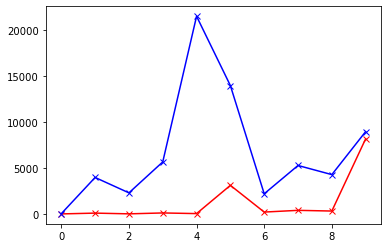

In [23]:
plt.plot(range(0, n_epochs), train_loss, 'rx-')
plt.plot(range(0, n_epochs), val_loss, 'bx-')

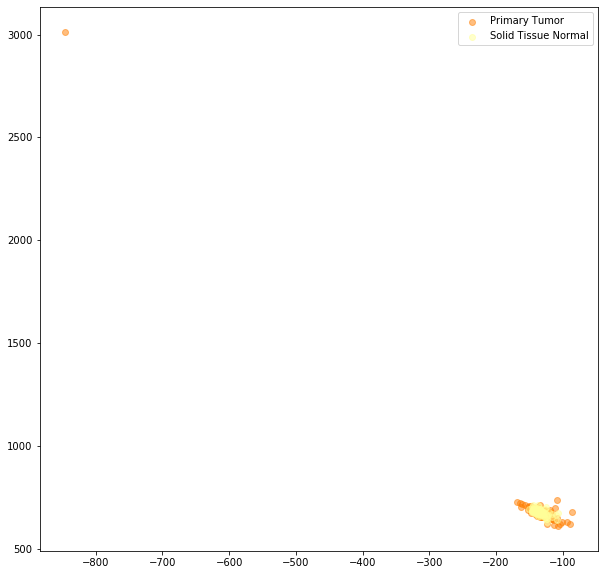

In [24]:
train_embeddings_cl, train_labels_cl = vis.extract_embeddings(train_loader, model)
vis.plot_embeddings(train_embeddings_cl, train_labels_cl, classes.keys())

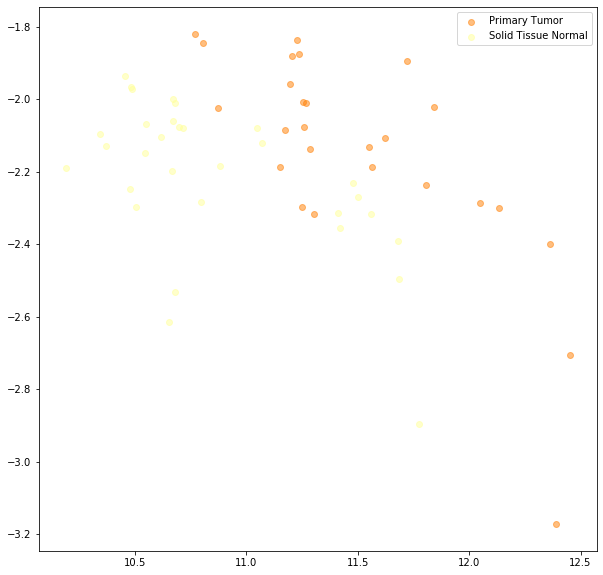

In [18]:
val_embeddings_baseline, val_labels_baseline = vis.extract_embeddings(test_loader, model)
vis.plot_embeddings(val_embeddings_baseline, val_labels_baseline, classes.keys())

## Activation Maximization

In [19]:
import copy
from captum.attr import LayerActivation

In [20]:
tmp_model = copy.deepcopy(model)

In [21]:
tmp_model

SiameseNet(
  (embedding_net): EmbeddingNet(
    (fc): Sequential(
      (linear1): Linear(in_features=60483, out_features=2000, bias=True)
      (relu1): PReLU(num_parameters=1)
      (linear2): Linear(in_features=2000, out_features=500, bias=True)
      (relu2): PReLU(num_parameters=1)
      (linear3): Linear(in_features=500, out_features=250, bias=True)
      (relu3): PReLU(num_parameters=1)
      (linear4): Linear(in_features=250, out_features=100, bias=True)
      (relu4): PReLU(num_parameters=1)
      (linear5): Linear(in_features=100, out_features=50, bias=True)
      (relu5): PReLU(num_parameters=1)
      (linear6): Linear(in_features=50, out_features=10, bias=True)
      (relu6): PReLU(num_parameters=1)
      (linear7): Linear(in_features=10, out_features=2, bias=True)
    )
  )
)

In [22]:
data1, data2, label = tuple(siamese_test_dataset.test_pairs[-1])
data1 = Variable(siamese_test_dataset.test_data[data1], requires_grad=True).cuda().view(1, -1)
data2 = Variable(siamese_test_dataset.test_data[data2], requires_grad=True).cuda().view(1, -1)

### Integrated Gradients; single sample POC

In [23]:
from captum.attr import IntegratedGradients

In [24]:
ig = IntegratedGradients(tmp_model.get_embedding)

In [25]:
data1.shape
data2.shape

torch.Size([1, 60483])

torch.Size([1, 60483])

In [41]:
attr, delta = ig.attribute(data1,target=0, return_convergence_delta=True, n_steps=50)
attr = attr.cpu().detach().numpy()

In [42]:
feat_imp = pd.Series(data=attr[0], index=train_dataset.data.columns)

In [43]:
feat_imp.nlargest(20)

0
ENSG00000087086.12    0.431279
ENSG00000198938.2     0.245747
ENSG00000198804.2     0.167750
ENSG00000198727.2     0.107913
ENSG00000198899.2     0.107248
ENSG00000198712.1     0.098304
ENSG00000198886.2     0.080878
ENSG00000205542.9     0.071370
ENSG00000075624.12    0.070286
ENSG00000117984.11    0.069928
ENSG00000112306.7     0.064462
ENSG00000129538.12    0.062404
ENSG00000034510.5     0.055984
ENSG00000197746.12    0.052530
ENSG00000198888.2     0.051370
ENSG00000184009.8     0.049480
ENSG00000166710.16    0.041028
ENSG00000111341.8     0.040429
ENSG00000156508.16    0.040328
ENSG00000204287.12    0.036875
dtype: float32

### All tumor samples; avg feature attribution

In [44]:
classes
tumor_test_idx = siamese_test_dataset.label_to_indices[classes['Primary Tumor']]
tumor_test = Variable(siamese_test_dataset.test_data[tumor_test_idx], requires_grad=True).cuda()

{'Primary Tumor': 0, 'Solid Tissue Normal': 1}

In [46]:
tumor_test.requires_grad

True

In [60]:
attr, delta = ig.attribute(tumor_test ,target=0, return_convergence_delta=True)
attr = attr.cpu().detach().numpy()

(26, 60483)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c662e5940>]],
      dtype=object)

,Attribution
count,60483.000000
mean,0.000188
std,0.001445
min,-0.018137
25%,0.000000
50%,0.000002
75%,0.000030
max,0.155446


,Attribution
0,
ENSG00000198938.2,0.155446
ENSG00000198804.2,0.117753
ENSG00000087086.12,0.073962
ENSG00000198899.2,0.071012
ENSG00000198712.1,0.069445
ENSG00000198727.2,0.065428
ENSG00000075624.12,0.058782
ENSG00000198886.2,0.058254
ENSG00000184009.8,0.053890


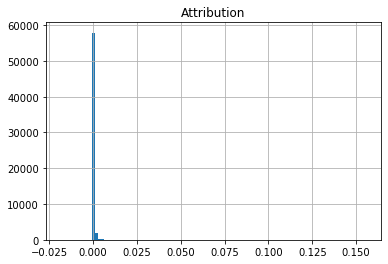

In [97]:
attr.shape
feat_imp = pd.DataFrame(data=attr.mean(axis=0), index=train_dataset.data.columns, columns=['Attribution'])
feat_imp.hist(bins=100)
feat_imp.describe()
feat_imp.nlargest(10, columns='Attribution')

In [98]:
id_map = pd.read_csv("/srv/home/wconnell/keiser/data/uniprot_mapping_ids/map_ensembl_uniprot.csv").set_index(['ENSEMBL_ID'])
id_map.head()

,UNIPROT_ID
ENSEMBL_ID,
ENSG00000000005,TNMD_HUMAN
ENSG00000000419,DPM1_HUMAN
ENSG00000000419,H0Y368_HUMAN
ENSG00000000419,Q5QPJ9_HUMAN
ENSG00000000419,Q5QPK2_HUMAN


In [100]:
feat_imp.index = [ens[0] for ens in feat_imp.index.str.split(".")]
feat_imp.nlargest(50, columns='Attribution')
feat_imp = pd.merge(feat_imp, id_map, left_index=True, right_index=True, how='inner')

,Attribution
ENSG00000198938,0.155446
ENSG00000198804,0.117753
ENSG00000087086,0.073962
ENSG00000198899,0.071012
ENSG00000198712,0.069445
ENSG00000198727,0.065428
ENSG00000075624,0.058782
ENSG00000198886,0.058254
ENSG00000184009,0.053890
ENSG00000112306,0.046174


In [105]:
feat_imp[feat_imp['UNIPROT_ID']=='P53_HUMAN']
feat_imp[feat_imp['UNIPROT_ID']=='BRCA1_HUMAN']

,Attribution,UNIPROT_ID
ENSG00000141510,0.001622,P53_HUMAN


,Attribution,UNIPROT_ID
ENSG00000012048,0.000236,BRCA1_HUMAN
